# 1. 기본설정
## (1) 라이브러리

In [1]:
########################### 1. 기본 설정 ##########################
import time
start_time = time.time()

import os
import pandas as pd
import numpy as np
import copy

######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
import tensorflow_hub as hub

### (3) 데이터 분리 


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

### (2) 분류 예측 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.manifold import TSNE

## (2) 파라미터 설정

In [2]:
########################### 1. 기본 설정 ##########################


######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

upsize_factor = 0  # 0: 1배, 1: 4배, 2:16배... 1올라갈 때마다 4배씩 증가. 아직은 1만 유효.

blur_filter = True
contour_filter = False
edge_enhance_filter = False

filter_num = 0  # 위에서 설정한 필터의 사용 개수(True의 개수)에 따라 자동 변경. 건드리지 말 것.

if blur_filter == True:
    filter_num += 1
if contour_filter == True:
    filter_num += 1
if edge_enhance_filter == True:
    filter_num += 1
    
### (3) 데이터 분리 

# tts_test_size = 0.2
# test_size = 0.15   # 1미만. val_size와의 합이 0.5를 넘지 않게.
# val_size = 0.15   # 1미만. test_size와의 합이 0.5를 넘지 않게.

train_test_split_randomstate = 5


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 
raw_image_size = 8
upsized_image_size = raw_image_size * (4 ** upsize_factor)
class_num = 6    # 대상 개수

is_global_feature = False  # Global feature 사용 여부 지정.
classes_num = 6
epoch_num = 20

### (2) 분류 예측 
classifier_random_state = 32



## (3) 데이터 로드

In [3]:
# data_dir = 'C:/Users/user/Documents/GitHub/Hackathon2022/Dataset/'  # Github 경로
data_dir = 'C:/Users/user/Google 드라이브/AIFFEL/+Final project/data/20220519/'  # Google drive 경로

# data1 부분 데이터 로드
data_path1_1 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po1.csv')
data1_1 = pd.read_csv(data_path1_1)

data_path1_2 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po2.csv')
data1_2 = pd.read_csv(data_path1_2)

data_path1_3 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po3.csv')
data1_3 = pd.read_csv(data_path1_3)

data_path1_4 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po4.csv')
data1_4 = pd.read_csv(data_path1_4)

data_path1_5 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po5.csv')
data1_5 = pd.read_csv(data_path1_5)

data_path1_6 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po6.csv')
data1_6 = pd.read_csv(data_path1_6)

data_path1_7 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po7.csv')
data1_7 = pd.read_csv(data_path1_7)

data_path1_8 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po8.csv')
data1_8 = pd.read_csv(data_path1_8)

data_path1_9 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po9.csv')
data1_9 = pd.read_csv(data_path1_9)


# data2 부분 데이터 로드
data_path2_1 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po1.csv')
data2_1 = pd.read_csv(data_path1_1)

data_path2_2 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po2.csv')
data2_2 = pd.read_csv(data_path1_2)

data_path2_3 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po3.csv')
data2_3 = pd.read_csv(data_path1_3)

data_path2_4 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po4.csv')
data2_4 = pd.read_csv(data_path1_4)

data_path2_5 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po5.csv')
data2_5 = pd.read_csv(data_path1_5)

data_path2_6 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po6.csv')
data2_6 = pd.read_csv(data_path1_6)

data_path2_7 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po7.csv')
data2_7 = pd.read_csv(data_path1_7)

data_path2_8 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po8.csv')
data2_8 = pd.read_csv(data_path1_8)

data_path2_9 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po9.csv')
data2_9 = pd.read_csv(data_path1_9)


# data3 부분 데이터 로드
data_path3_1 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po1.csv')
data3_1 = pd.read_csv(data_path3_1)

data_path3_2 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po2.csv')
data3_2 = pd.read_csv(data_path3_2)

data_path3_3 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po3.csv')
data3_3 = pd.read_csv(data_path3_3)

data_path3_4 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po4.csv')
data3_4 = pd.read_csv(data_path3_4)

data_path3_5 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po5.csv')
data3_5 = pd.read_csv(data_path3_5)

data_path3_6 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po6.csv')
data3_6 = pd.read_csv(data_path3_6)

data_path3_7 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po7.csv')
data3_7 = pd.read_csv(data_path3_7)

data_path3_8 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po8.csv')
data3_8 = pd.read_csv(data_path3_8)

data_path3_9 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po9.csv')
data3_9 = pd.read_csv(data_path3_9)


# data4 부분 데이터 로드
data_path4_1 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po1.csv')
data4_1 = pd.read_csv(data_path4_1)

data_path4_2 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po2.csv')
data4_2 = pd.read_csv(data_path4_2)

data_path4_3 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po3.csv')
data4_3 = pd.read_csv(data_path4_3)

data_path4_4 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po4.csv')
data4_4 = pd.read_csv(data_path4_4)

data_path4_5 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po5.csv')
data4_5 = pd.read_csv(data_path4_5)

data_path4_6 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po6.csv')
data4_6 = pd.read_csv(data_path4_6)

data_path4_7 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po7.csv')
data4_7 = pd.read_csv(data_path4_7)

data_path4_8 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po8.csv')
data4_8 = pd.read_csv(data_path4_8)

data_path4_9 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po9.csv')
data4_9 = pd.read_csv(data_path4_9)


# data5 부분 데이터 로드
data_path5_1 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po1.csv')
data5_1 = pd.read_csv(data_path5_1)

data_path5_2 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po2.csv')
data5_2 = pd.read_csv(data_path5_2)

data_path5_3 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po3.csv')
data5_3 = pd.read_csv(data_path5_3)

data_path5_4 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po4.csv')
data5_4 = pd.read_csv(data_path5_4)

data_path5_5 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po5.csv')
data5_5 = pd.read_csv(data_path5_5)

data_path5_6 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po6.csv')
data5_6 = pd.read_csv(data_path5_6)

data_path5_7 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po7.csv')
data5_7 = pd.read_csv(data_path5_7)

data_path5_8 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po8.csv')
data5_8 = pd.read_csv(data_path5_8)

data_path5_9 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po9.csv')
data5_9 = pd.read_csv(data_path5_9)


# data6 부분 데이터 로드
data_path6_1 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po1.csv')
data6_1 = pd.read_csv(data_path6_1)

data_path6_2 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po2.csv')
data6_2 = pd.read_csv(data_path6_2)

data_path6_3 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po3.csv')
data6_3 = pd.read_csv(data_path6_3)

data_path6_4 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po4.csv')
data6_4 = pd.read_csv(data_path6_4)

data_path6_5 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po5.csv')
data6_5 = pd.read_csv(data_path6_5)

data_path6_6 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po6.csv')
data6_6 = pd.read_csv(data_path6_6)

data_path6_7 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po7.csv')
data6_7 = pd.read_csv(data_path6_7)

data_path6_8 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po8.csv')
data6_8 = pd.read_csv(data_path6_8)

data_path6_9 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po9.csv')
data6_9 = pd.read_csv(data_path6_9)



In [4]:
# data1 = pd.concat([data1_1.iloc[:10], data1_2.iloc[:10], data1_3.iloc[:10], data1_4.iloc[:10],data1_5.iloc[:10],
#                  data1_6.iloc[:10], data1_7.iloc[:10], data1_8.iloc[:10], data1_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data1['Label'] = 1 # Label 부여

# data2 = pd.concat([data2_1.iloc[:10], data2_2.iloc[:10], data2_3.iloc[:10], data2_4.iloc[:10],data2_5.iloc[:10],
#                  data2_6.iloc[:10], data2_7.iloc[:10], data2_8.iloc[:10], data2_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data2['Label'] = 2 # Label 부여

# data3 = pd.concat([data3_1.iloc[:10], data3_2.iloc[:10], data3_3.iloc[:10], data3_4.iloc[:10],data3_5.iloc[:10],
#                  data3_6.iloc[:10], data3_7.iloc[:10], data3_8.iloc[:10], data3_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data3['Label'] = 3 # Label 부여

# data4 = pd.concat([data4_1.iloc[:10], data4_2.iloc[:10], data4_3.iloc[:10], data4_4.iloc[:10],data4_5.iloc[:10],
#                  data4_6.iloc[:10], data4_7.iloc[:10], data4_8.iloc[:10], data4_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data4['Label'] = 4 # Label 부여

# data5 = pd.concat([data5_1.iloc[:10], data5_2.iloc[:10], data5_3.iloc[:10], data5_4.iloc[:10],data5_5.iloc[:10],
#                  data5_6.iloc[:10], data5_7.iloc[:10], data5_8.iloc[:10], data5_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data5['Label'] = 5 # Label 부여

# data6 = pd.concat([data6_1.iloc[:10], data6_2.iloc[:10], data6_3.iloc[:10], data6_4.iloc[:10],data6_5.iloc[:10],
#                  data6_6.iloc[:10], data6_7.iloc[:10], data6_8.iloc[:10], data6_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data6['Label'] = 6 # Label 부여



data1 = pd.concat([data1_1.iloc[:50], data1_2.iloc[:50], data1_3.iloc[:50], data1_4.iloc[:50],data1_5.iloc[:50],
                 data1_6.iloc[:50], data1_7.iloc[:50], data1_8.iloc[:50], data1_9.iloc[:50]])  # 50개 행씩 추려 합침.
data1['Label'] = 1 # Label 부여

data2 = pd.concat([data2_1.iloc[:50], data2_2.iloc[:50], data2_3.iloc[:50], data2_4.iloc[:50],data2_5.iloc[:50],
                 data2_6.iloc[:50], data2_7.iloc[:50], data2_8.iloc[:50], data2_9.iloc[:50]])  # 50개 행씩 추려 합침.
data2['Label'] = 2 # Label 부여

data3 = pd.concat([data3_1.iloc[:50], data3_2.iloc[:50], data3_3.iloc[:50], data3_4.iloc[:50],data3_5.iloc[:50],
                 data3_6.iloc[:50], data3_7.iloc[:50], data3_8.iloc[:50], data3_9.iloc[:50]])  # 50개 행씩 추려 합침.
data3['Label'] = 3 # Label 부여

data4 = pd.concat([data4_1.iloc[:50], data4_2.iloc[:50], data4_3.iloc[:50], data4_4.iloc[:50],data4_5.iloc[:50],
                 data4_6.iloc[:50], data4_7.iloc[:50], data4_8.iloc[:50], data4_9.iloc[:50]])  # 50개 행씩 추려 합침.
data4['Label'] = 4 # Label 부여

data5 = pd.concat([data5_1.iloc[:50], data5_2.iloc[:50], data5_3.iloc[:50], data5_4.iloc[:50],data5_5.iloc[:50],
                 data5_6.iloc[:50], data5_7.iloc[:50], data5_8.iloc[:50], data5_9.iloc[:50]])  # 50개 행씩 추려 합침.
data5['Label'] = 5 # Label 부여

data6 = pd.concat([data6_1.iloc[:50], data6_2.iloc[:50], data6_3.iloc[:50], data6_4.iloc[:50],data6_5.iloc[:50],
                 data6_6.iloc[:50], data6_7.iloc[:50], data6_8.iloc[:50], data6_9.iloc[:50]])  # 50개 행씩 추려 합침.
data6['Label'] = 6 # Label 부여



In [5]:
print(type(data6))
print(data6.shape)
data6.head()

<class 'pandas.core.frame.DataFrame'>
(450, 65)


,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
0,0,0,0,0,0,0,0,0,0,23,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,24,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,28,...,0,0,0,0,0,0,0,0,0,6


In [6]:
# train_data = pd.concat([data1[:80], data2[:80], data3[:80], data4[:80], data5[:80], data6[:80]])  # 1~8번 자세
# test_data = pd.concat([data1[80:], data2[80:], data3[80:], data4[80:], data5[80:], data6[80:]])  # 9번 자세

train_data = pd.concat([data1[:400], data2[:400], data3[:400], data4[:400], data5[:400], data6[:400]])  # 1~8번 자세
test_data = pd.concat([data1[400:], data2[400:], data3[400:], data4[400:], data5[400:], data6[400:]])  # 9번 자세
# feature_data.shape

In [7]:
# data = data.drop(['Unnamed: 0'], axis = 1)
# data.head(10)

In [8]:
# data = data.sample(frac = 1)
# # data = data.sample(frac = 1).reset_index(drop = True)
# data.head()

In [9]:
feature_train = train_data.iloc[:,:-1]
label_train = train_data.iloc[:, -1]
feature_test = test_data.iloc[:,:-1]
label_test = test_data.iloc[:, -1]
print(feature_train.shape)
print(label_train.shape)
print(feature_test.shape)
print(label_test.shape)

(2400, 64)
(2400,)
(300, 64)
(300,)


In [10]:
temp_array_feature_train = feature_train.to_numpy()

list_feature_train = []
for i in range(len(temp_array_feature_train)):
    reshaped_array = temp_array_feature_train[i].reshape(raw_image_size,raw_image_size)
    list_feature_train.append(reshaped_array)
    
array_feature_train = np.array(list_feature_train)
array_feature_train = array_feature_train.astype('uint8')

print("어레이 변환된 훈련 feature의 shape:", array_feature_train.shape)

temp_array_feature_test = feature_test.to_numpy()

list_feature_test = []
for i in range(len(temp_array_feature_test)):
    reshaped_array = temp_array_feature_test[i].reshape(raw_image_size,raw_image_size)
    list_feature_test.append(reshaped_array)
    
array_feature_test = np.array(list_feature_test)
array_feature_test = array_feature_test.astype('uint8')

print("어레이 변환된 테스트 feature의 shape:", array_feature_test.shape)

어레이 변환된 훈련 feature의 shape: (2400, 8, 8)
어레이 변환된 테스트 feature의 shape: (300, 8, 8)


In [11]:
array_feature_train[0,0]

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

데이터 이미지화


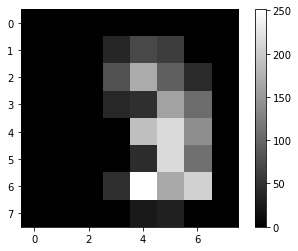

In [12]:
print('데이터 이미지화')
plt.imshow(array_feature_train[1] , cmap='gray')
plt.colorbar();

# 2. 데이터 전처리
## (1) 데이터 증강

### 이미지 리사이즈

In [13]:

print("사이즈 변경 전 이미지 크기: {}".format(array_feature_train[1].shape))
def image_upsize(array_feature, upsize_factor):
    
    SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1" 
    super_resolution_model = hub.load(SAVED_MODEL_PATH) # 3채널에서만 작동.
    tf_array_feature = tf.convert_to_tensor(array_feature)
    tf_array_feature = tf.cast(tf_array_feature, tf.float32) # uint8 -> float32
    upsized_array_feature = []
    for i, array in enumerate(tf_array_feature):
        
        # model은 3채널용이므로, 이미지를 1채널 -> 3채널로 확장
        temp_array = copy.deepcopy(array)
        temp_array = tf.expand_dims(temp_array, 2)
        temp_array = tf.expand_dims(temp_array, 0)
        temp_array_2 = copy.deepcopy(temp_array)
        temp_array_3 = copy.deepcopy(temp_array)
        temp_array = np.concatenate((temp_array, temp_array_2), axis = 3)
        temp_array = np.concatenate((temp_array, temp_array_3), axis = 3)
    
        # 업사이즈 적용
        if upsize_factor > 0:
            for i in range(upsize_factor):
                temp_array = super_resolution_model(temp_array) 
        
        # 3채널 -> 1채널로 복구
        upsized_temp_array = tf.squeeze(temp_array)
        grayscale_upsized_temp_array = (upsized_temp_array[:,:,0] + 
                                        upsized_temp_array[:,:,1] + upsized_temp_array[:,:,2])/3
        upsized_array_feature.append(grayscale_upsized_temp_array)
#         if i == 3:
#             break
    return np.array(upsized_array_feature)
# print("upsize 전:",array_feature.shape)
array_feature_train = image_upsize(array_feature_train, upsize_factor)
array_feature_test = image_upsize(array_feature_test, upsize_factor)
# print("upsize 후:",array_feature.shape)
print("사이즈 변경 후 이미지 크기: {}".format(array_feature_train[1].shape))

사이즈 변경 전 이미지 크기: (8, 8)
사이즈 변경 후 이미지 크기: (8, 8)


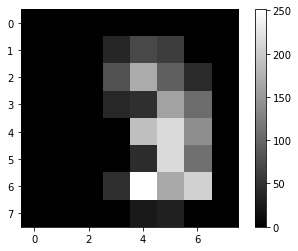

In [14]:
plt.imshow(array_feature_train[1] , cmap='gray')
plt.colorbar();

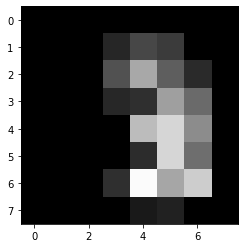

In [15]:
test_image = Image.fromarray(array_feature_train[1])
plt.imshow(test_image)

In [16]:
# test_image_BLUR = test_image.filter(ImageFilter.BLUR)

In [17]:
# array_feature에 filter augmented data를 concatenate.
def filter_concat(array_feature, blur_filter = False, contour_filter = False, 
                  edge_enhance_filter = False):
    
    filteradded_array_feature = []
    
    for i, j in enumerate(array_feature):
        image = Image.fromarray(array_feature[i])
        stack_array = np.expand_dims(array_feature[i], axis = 2)
        
        if blur_filter:
            image_BLUR = image.filter(ImageFilter.BLUR)
            blur_array_feature = np.array(image_BLUR)
            blur_stack_array = np.expand_dims(blur_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, blur_stack_array), axis = 2)
            
        if contour_filter:
            image_CONTOUR = image.filter(ImageFilter.CONTOUR)
            contour_array_feature = np.array(image_CONTOUR)
            contour_stack_array = np.expand_dims(contour_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, contour_stack_array), axis = 2)
            
        if edge_enhance_filter:
            image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)
            edge_enhance_array_feature = np.array(image_EDGE_ENHANCE)
            edge_enhance_stack_array = np.expand_dims(edge_enhance_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, edge_enhance_stack_array), axis = 2)
    
        filteradded_array_feature.append(stack_array)
    
    filteradded_array_feature = np.array(filteradded_array_feature)
    return filteradded_array_feature
    


In [18]:
array_feature_train.shape

(2400, 8, 8)

In [19]:
# final_feature_train = copy.deepcopy(array_feature_train)
final_feature_train = filter_concat(array_feature_train, blur_filter = blur_filter, contour_filter = contour_filter, 
                  edge_enhance_filter = edge_enhance_filter)

print("최종 훈련 feature의 shape:", final_feature_train.shape)

# final_feature_test = copy.deepcopy(array_feature_test)
final_feature_test = filter_concat(array_feature_test, blur_filter = blur_filter, contour_filter = contour_filter, 
                  edge_enhance_filter = edge_enhance_filter)

print("최종 테스트 feature의 shape:", final_feature_test.shape)

ValueError: image has wrong mode

## (3) 데이터 분리

In [ ]:

# # Train data 초반 70%, Test data 다음 15%, Validation data 마지막 15%
# local_X_train = final_feature[:int(len(feature)*(1-test_size-val_size))]
# # print("1st",local_X_train.shape)
# local_X_test = final_feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
# # print("1st",local_X_test.shape)
# local_X_val = final_feature[int(len(feature)*(1-val_size)):]
# # print("1st",local_X_val.shape)

y_train = label_train
y_test =  label_test
# y_val = label[int(len(feature)*(1-val_size)):]

# local_X_train, local_X_test, y_train, y_test = train_test_split(final_feature, label, 
#                                                     test_size = tts_test_size, random_state= train_test_split_randomstate)    ## test_size를 변경하며 시험.
# Normalization
local_X_train = final_feature_train / 255.0
local_X_test = final_feature_test / 255.0
# local_X_val = local_X_val / 255.0

# local_X_train = final_feature_train/127.5-1
# local_X_test = final_feature_test/127.5-1
# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = tf.data.Dataset.from_tensor_slices((local_X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((local_X_test, y_test))
# print(local_X_train.shape)
# print(local_X_test.shape)
# print(local_X_val.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(y_val.shape)

In [ ]:
local_X_train[1]

In [ ]:
# global feature는 아직 미사용.
# global_X_train = feature_train[:int(len(feature)*(1-test_size))]
# global_X_test = feature_test[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
# global_X_val = feature[int(len(feature)*(1-val_size)):]
# global_X_train.shape

# 3. 모델 학습

## (1) 모델 설계 및 대표 벡터 추출

In [ ]:
filter_num

In [ ]:
# concat_VGG16

# 1st block
local_input = Input(shape = (upsized_image_size, upsized_image_size, filter_num+1), name = 'Local feature (Image) Input')
x = Conv2D(64, (3,3), activation = 'sigmoid', padding = 'same', name = 'block1_conv1')(local_input)
x = Conv2D(64, (3,3), activation = 'sigmoid', padding = 'same', name = 'block1_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block1_pool')(x)

# 2nd block
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block2_pool')(x)

# 3rd block
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block3_pool')(x)

if upsize_factor == 1:
    # 4th block
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv1')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv2')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv3')(x)
    x = MaxPool2D((2,2), strides = (2,2), name = 'block4_pool')(x)
    
    # 5th block
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv1')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv2')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv3')(x)
    x = MaxPool2D((2,2), strides = (2,2), name = 'block5_pool')(x)

# Local feature + Global feature 사용
if is_global_feature: 
    # Concatenation block
    x = Flatten(name = 'flatten')(x)
    global_input = Input(shape = (len(global_X_train.columns)), name = 'Global feature Input')
    concat = concatenate([x, global_input], name = 'Feature_concatenation')
    
    # Final block
    x = Dense(1024, activation = 'relu', name = 'fc1')(concat)  # 초기값 4096
    output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    
    prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)
    modified_VGG16_model = Model(inputs = [local_input, global_input], outputs = prediction, name = 'Concat_VGG16_model')


# Local feature만 사용.
else:
    # Simpple flatten block
    x = Flatten(name = 'flatten')(x)
    
    # Final block
    x = Dense(1024, activation = 'relu', name = 'fc1')(x)       # 초기값 4096
    output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    
    prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)    
    modified_VGG16_model = Model(inputs = local_input, outputs = prediction, name = 'Simpler_VGG16_model')


modified_VGG16_model.summary()

In [ ]:
# 모델 도면 출력
plot_model(modified_VGG16_model, 'modified_VGG16_model.png', show_shapes = True)

In [ ]:
print(local_X_train.shape)
print(local_X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# 모델 학습
modified_VGG16_model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

if is_global_feature:
    modified_VGG16_model.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    modified_VGG16_model.evaluate([local_X_test, global_X_test], y_test, verbose = 2)
else:
    modified_VGG16_model.fit(local_X_train, y_train, epochs = epoch_num)
    modified_VGG16_model.evaluate(local_X_test, y_test, verbose = 2)

In [ ]:
# 모델의 Feature list 확인
modified_VGG16_features_list = [layer.output for layer in modified_VGG16_model.layers]
modified_VGG16_features_list

In [ ]:
modified_VGG16_feat_extraction_model = Model(inputs = modified_VGG16_model.input, outputs = modified_VGG16_features_list)

if is_global_feature == True:
    train_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_test, global_X_test])
#     val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_val, global_X_val])
else: 
    train_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
#     val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

In [ ]:
train_modified_VGG16_representations = np.array(train_modified_VGG16_extracted_features[0], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[0], dtype = object)
# val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)
print(type(train_modified_VGG16_representations))
print(train_modified_VGG16_representations.shape)
train_modified_VGG16_representations

In [ ]:
dummy_modified_VGG16_representations = np.array(train_modified_VGG16_extracted_features[1], dtype = object)
print(type(dummy_modified_VGG16_representations))
print(dummy_modified_VGG16_representations.shape)
dummy_modified_VGG16_representations

## (2) 분류 예측 및 예외 처리

In [ ]:
# K-Neighbors 
KN_classifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric = 'minkowski')
KN_classifier.fit(train_modified_VGG16_representations, y_train)

# Decision tree
DT_classifier = DecisionTreeClassifier(random_state = classifier_random_state)   ## 모델 지정
DT_classifier.fit(train_modified_VGG16_representations, y_train)


# Random forest
RF_classifier = RandomForestClassifier(random_state = classifier_random_state)   ## 모델 지정
RF_classifier.fit(train_modified_VGG16_representations, y_train)


# Support vector machine
SVM_classifier = svm.SVC(random_state = classifier_random_state, kernel = 'linear', C = 10)   ## C가 클수록 정확해짐
SVM_classifier.fit(train_modified_VGG16_representations, y_train)


# Stochastic gradient descent
SGD_classifier = SGDClassifier(random_state = classifier_random_state)   ## 모델 지정
SGD_classifier.fit(train_modified_VGG16_representations, y_train)


# Logistic regression
LR_classifier = LogisticRegression(random_state = classifier_random_state, max_iter = 5000)   ## 모델 지정
LR_classifier.fit(train_modified_VGG16_representations, y_train)

# Multinomial Naive Bayes
MNB_classifier = MultinomialNB()   ## 모델 지정
MNB_classifier.fit(train_modified_VGG16_representations, y_train)


In [ ]:
print('*** K-Neighbors classifier result ***')
KN_y_pred = KN_classifier.predict(val_modified_VGG16_representations)
KN_report = classification_report(y_test, KN_y_pred)
print(KN_report)

print('*** Decision tree classifier result ***')
DT_y_pred = DT_classifier.predict(val_modified_VGG16_representations)
DT_report = classification_report(y_test, DT_y_pred)
print(DT_report)

print('*** Random forest classifier result ***')
RF_y_pred = RF_classifier.predict(val_modified_VGG16_representations)
RF_report = classification_report(y_test, RF_y_pred)
print(RF_report)

print('*** Support vector machine classifier result ***')
SVM_y_pred = SVM_classifier.predict(val_modified_VGG16_representations)
SVM_report = classification_report(y_test, SVM_y_pred)
print(SVM_report)

print('*** Stochastic gradient descent classifier result ***')
SGD_y_pred = SGD_classifier.predict(val_modified_VGG16_representations)
SGD_report = classification_report(y_test, SGD_y_pred)
print(SGD_report)

print('*** Logistic regression classifier result ***')
LR_y_pred = LR_classifier.predict(val_modified_VGG16_representations)
LR_report = classification_report(y_test, LR_y_pred)
print(LR_report)

print('*** Multinomial Naive Bayes classifier result ***')
MNB_y_pred = MNB_classifier.predict(val_modified_VGG16_representations)
MNB_report = classification_report(y_test, LR_y_pred)
print(MNB_report)


## (3) 결과 시각화
### Confusion matrix

In [ ]:
# Confusion matrix 계산 및 히트맵 시각화

KN_cm = confusion_matrix(y_test, KN_y_pred)
DT_cm = confusion_matrix(y_test, DT_y_pred)
RF_cm = confusion_matrix(y_test, RF_y_pred)
SVM_cm = confusion_matrix(y_test, SVM_y_pred)
SGD_cm = confusion_matrix(y_test, SGD_y_pred)
LR_cm = confusion_matrix(y_test, LR_y_pred)
MNB_cm = confusion_matrix(y_test, MNB_y_pred)



sns.set(rc = {'figure.figsize':(15,15)})
fig, axes = plt.subplots(nrows = 4, ncols = 2)
sns.heatmap(KN_cm/np.sum(KN_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,0])
sns.heatmap(DT_cm/np.sum(DT_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,1])
sns.heatmap(RF_cm/np.sum(RF_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,0])
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,1])
sns.heatmap(SGD_cm/np.sum(SGD_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,0])
sns.heatmap(LR_cm/np.sum(LR_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,1])
sns.heatmap(MNB_cm/np.sum(MNB_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[3,0])
    

### TSNE

In [ ]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(train_modified_VGG16_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]

In [ ]:
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'HHY')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
plt.savefig('tsne_sample.png')

In [ ]:
from metric_learn import LMNN
from metric_learn import NCA
from metric_learn import LFDA
from metric_learn import MLKR
from metric_learn import MMC_Supervised


lmnn = LMNN(k=5, learn_rate=1e-6)
lmnn.fit(train_modified_VGG16_representations, y_train)

In [ ]:
nca = NCA(max_iter=1000)
nca.fit(train_modified_VGG16_representations, y_train)

In [ ]:
lfda = LFDA(k=2)
lfda.fit(train_modified_VGG16_representations, y_train)

In [ ]:
mlkr = MLKR()
mlkr.fit(train_modified_VGG16_representations, y_train)

In [ ]:
mmc = MMC_Supervised(num_constraints=200)
mmc.fit(train_modified_VGG16_representations, y_train)